<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# web location:
local_csv = 'data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [8]:
# A:
nhl = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [9]:
# A:
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [10]:
nhl.columns

Index(['Team', 'PTS', 'Rank', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF',
       'SA', 'SF60', 'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF',
       'CA', 'CF60', 'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [11]:
# A:
nhl['Rank'].value_counts()
# 3 classes


3    31
2    30
1    29
Name: Rank, dtype: int64

### 4. What is the baseline accuracy?

In [12]:
# A:
nhl['Rank'].value_counts()


3    31
2    30
1    29
Name: Rank, dtype: int64

In [13]:
# the baseline accurarcy would just be 3, because it's the most frequently occuring class
# this would probably have very lowe performance- 31/90 so the baseline performance
# would be:
31/90

0.34444444444444444

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

<AxesSubplot:>

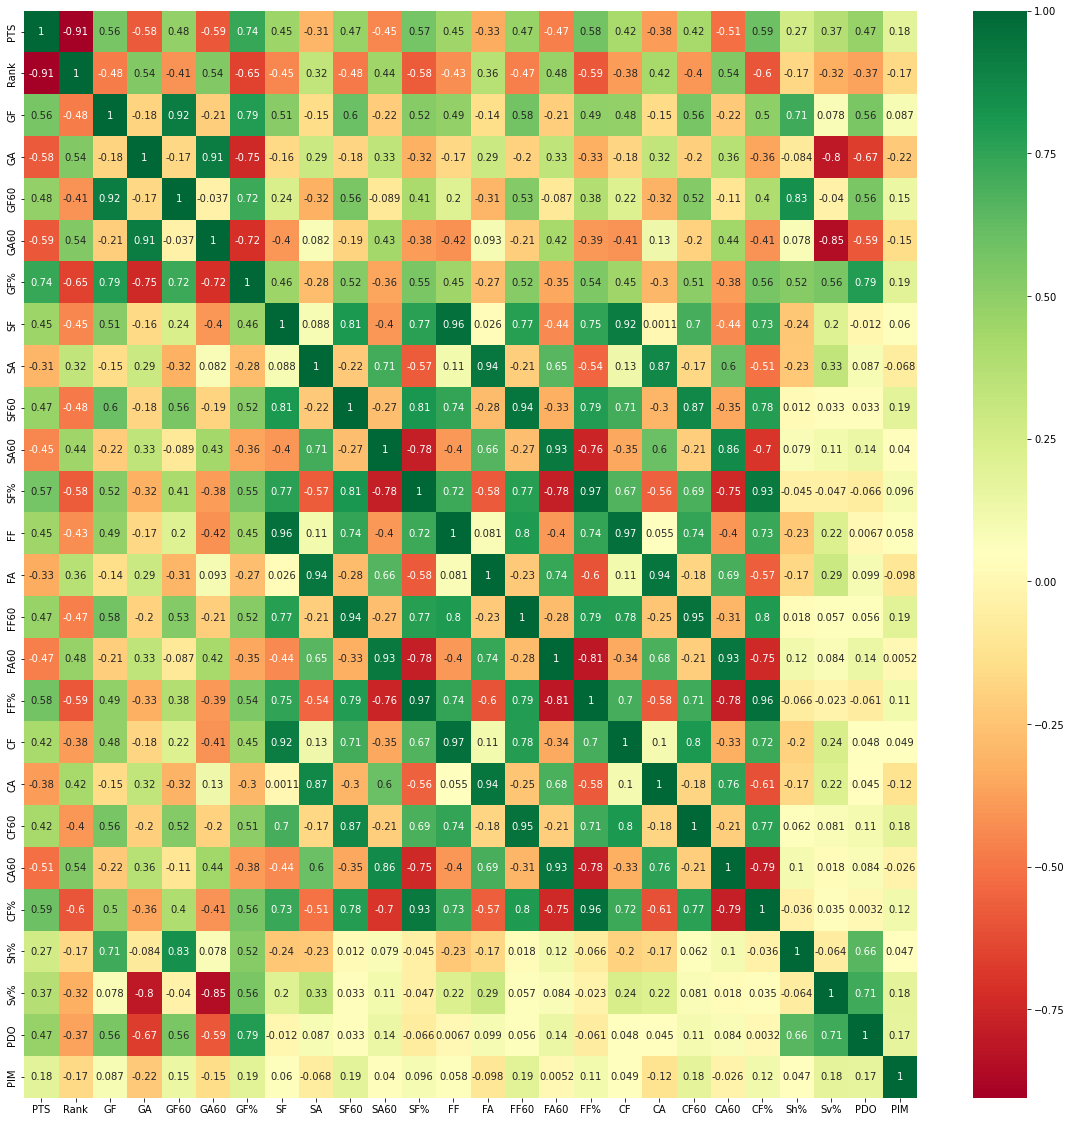

In [21]:
corrmat = nhl.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(nhl[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
# A:
X = nhl[['GF60', 'GA60', 'SF%', 'CA60' ]]

In [23]:
y=nhl['Rank']

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [32]:
# A:
sscaler = StandardScaler()
X_scaled=sscaler.fit_transform(X)

In [49]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_scaled, y)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [50]:
# A:
knn.score(X_scaled, y)

1.0

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [39]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, train_size=.5, random_state=42)


In [44]:
# scale
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled =sscaler.transform(X_test)

In [45]:
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)

In [46]:
knn.score(X_train_scaled, y_train)

0.7111111111111111

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [58]:
# A:
len(X_train_scaled)

45

In [60]:
len(y_train)

45

In [73]:
knn = KNeighborsClassifier(n_neighbors=len(y_train)).fit(X_train_scaled, y_train)

In [74]:
knn.score(X_train_scaled, y_train)

0.37777777777777777

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
# A:
scores = [] # list to track scores
for n in range(1,len(y_train)):
    knn = KNeighborsClassifier(n_neighbors=n) #create KNN with n neighbors
    score = cross_val_score(knn, X_train_scaled, y_train).mean()# cross validate
    scores.append(score)
    

In [77]:
scores

[0.5333333333333334,
 0.5555555555555556,
 0.48888888888888893,
 0.5777777777777777,
 0.6,
 0.5777777777777778,
 0.48888888888888893,
 0.5777777777777778,
 0.6,
 0.5333333333333334,
 0.6000000000000001,
 0.5333333333333334,
 0.4888888888888888,
 0.5333333333333334,
 0.5777777777777777,
 0.5555555555555556,
 0.5777777777777777,
 0.5555555555555556,
 0.6,
 0.5333333333333333,
 0.4666666666666666,
 0.4666666666666667,
 0.5333333333333334,
 0.4666666666666667,
 0.5333333333333334,
 0.5333333333333334,
 0.5333333333333334,
 0.5111111111111111,
 0.5111111111111111,
 0.5111111111111111,
 0.4666666666666666,
 0.4666666666666666,
 0.4444444444444445,
 0.4666666666666666,
 0.37777777777777777,
 0.37777777777777777,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

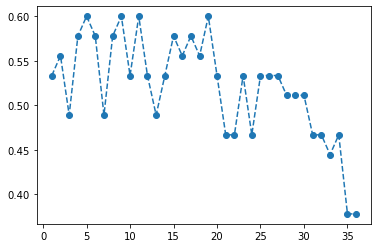

In [80]:
plt.plot(range(1, len(y_train)), scores, '--o');

In [65]:
np.argmax(scores)

10

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [ ]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [ ]:
# A: